# Start: Keras_Cifar_CNN

## 資料生成、歸一化、OneHot

In [2]:
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)


# 產生資料
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

# 打印資料信息
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

# 歸一化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

# 轉 OneHotEncoder
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)


train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


## 建立模型 model.summary

In [3]:
# 建立模型
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D,AveragePooling2D

# 次序性模型
model = Sequential()

# 卷積層1 與 池化層1
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 卷積層2 與 池化層2
model.add(Conv2D(filters=64, 
                 kernel_size=(3, 3), 
                 activation='relu', 
                 padding='same'))

model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(3, 3)))




# 平坦層、隱藏層、輸出層
model.add(Flatten())
model.add(Dropout(rate=0.25))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(10, activation='softmax'))

print(model.summary())






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         


## 加載 .h5

In [4]:
try:
    model.load_weights("Drive/cifar.h5")
    print("Loading the model successfully! Continue training model.")
except :    
    print("Loading the model failed! Start training a new model.")







Loading the model successfully! Continue training model.


## Optimizer

In [5]:
# optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])


## 訓練

In [0]:

# 訓練模型
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=128, verbose=1)      



Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 10s 257us/step - loss: 1.5152 - acc: 0.4546 - val_loss: 1.3171 - val_acc: 0.5811
Epoch 2/10
40000/40000 [==============================] - 8s 191us/step - loss: 1.1739 - acc: 0.5852 - val_loss: 1.1708 - val_acc: 0.6280
Epoch 3/10
40000/40000 [==============================] - 8s 193us/step - loss: 1.0387 - acc: 0.6317 - val_loss: 1.0929 - val_acc: 0.6459
Epoch 4/10
40000/40000 [==============================] - 8s 193us/step - loss: 0.9503 - acc: 0.6679 - val_loss: 0.9875 - val_acc: 0.6953
Epoch 5/10
40000/40000 [==============================] - 8s 191us/step - loss: 0.8711 - acc: 0.6931 - val_loss: 0.9518 - val_acc: 0.6862
Epoch 6/10
40000/40000 [==============================] - 8s 193us/step - loss: 0.8034 - acc: 0.7167 - val_loss: 0.8827 - val_acc: 0.7125
Epoch 7/10
40000/40000 [==============================] - 8s 190us/step - loss: 0.7476 - acc: 0.7347 - val_loss: 0.8743 -

## Show History

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [0]:
show_train_history('acc','val_acc')

In [0]:
show_train_history('loss','val_loss')

## 評估模型準確性

In [6]:
# 評估模型準確性
scores = model.evaluate(x_img_test_normalize, 
                        y_label_test_OneHot, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.7983947096824646
Test accuracy: 0.7311


## 預測

In [7]:
# 預測
prediction=model.predict_classes(x_img_test_normalize)
prediction[:10]


array([3, 8, 8, 0, 6, 6, 3, 6, 3, 1])

## 查看預測機率

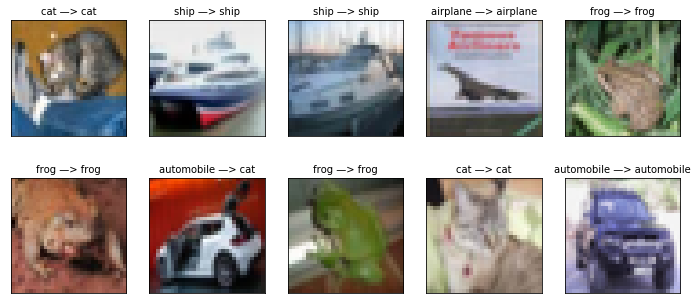

In [74]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+=' —> '+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

plot_images_labels_prediction(x_img_test,y_label_test,
                              prediction,0,10)

label: airplane predict: airplane


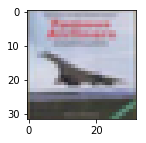

airplane Probability:0.525672376
automobile Probability:0.021028804
bird Probability:0.091700971
cat Probability:0.041171424
deer Probability:0.043301526
dog Probability:0.001221428
frog Probability:0.003451698
horse Probability:0.002511151
ship Probability:0.262778819
truck Probability:0.007161849


In [9]:
# 查看預測機率
Predicted_Probability=model.predict(x_img_test_normalize)

def show_Predicted_Probability(y,prediction,
                               x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],
          'predict:',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i],(32, 32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+
              ' Probability:%1.9f'%(Predicted_Probability[i][j]))
        
show_Predicted_Probability(y_label_test,prediction,
                           x_img_test,Predicted_Probability,3)
#                                                           ^Image_Number

## Confusion Matrix

In [0]:
prediction.shape
y_label_test.shape
y_label_test
y_label_test.reshape(-1)

import pandas as pd

print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,
            rownames=['label'],colnames=['predict'])

print(label_dict)


## Save Model to JSON

In [0]:
import os

In [0]:
os.mknod("cifar.json")
model_json = model.to_json()
with open("Drive/cifar.json", "w") as json_file:
    json_file.write(model_json)

In [0]:
model.save("my_model"+str(scores[1])+".h5")


In [0]:
model.save('cifar.json')

In [0]:
os.chdir("Drive")

## Save Model to YAML

In [0]:
model_yaml = model.to_yaml()
with open("SaveModel/cifarCnnModelnew.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)


## Save Weight to h5

In [0]:
model.save_weights("cifar.h5")
print("Saved model to disk")

Saved model to disk


## 鏈接 Google Drive

In [5]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131183 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.13-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.13-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.13-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [0]:
!mkdir -p Drive
!google-drive-ocamlfuse Drive

### Upload Files

In [0]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [0]:
files.download('blue.png')

## 目録

In [0]:
!ls

adc.json  Drive  sample_data


In [0]:
!cd Drive

In [7]:
!ls Drive

'2019-06-14 170923.mov'  'Colab Notebooks'   MAH00035.MP4    patch
 cifar.h5		  Keras_Cifar_CNN    NN		     Untitled
 cifar.json		  MAH00032.MP4	     NN_Lab1.ipynb   英语书RE3.pdf


## HHG（測試用）

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [34]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'Drive/Keras_Cifar_CNN/data/train',  # this is the target directory
        target_size=(32, 32),  # all images will be resized to 150x150
        batch_size=32,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'Drive/Keras_Cifar_CNN/data/validation',
        target_size=(32, 32),
        batch_size=32,
        class_mode='binary')

Found 20 images belonging to 10 classes.
Found 20 images belonging to 10 classes.


In [36]:
train_generator = train_datagen.flow_from_directory('train',
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory('validation',
                                                        target_size=(150,150),
                                                        batch_size=32,
                                                        class_mode='binary')
model.fit_generator(train_generator,
                    steps_per_epoch=1000,
                    epochs=60,
                    validation_data=validation_generator,
                    validation_steps=200)


FileNotFoundError: ignored

In [102]:
# 打印資料信息
print("train data:",'images:',train_datagen.shape,
      " labels:",train_generator.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

AttributeError: ignored

In [99]:
prediction=model.predict_classes(validation_generator)
prediction[:10]

ValueError: ignored

## 本地預測（手動打標籤）


In [0]:
import matplotlib
matplotlib.use('Agg')
import os
from keras.models import load_model
import numpy as np
from PIL import Image
import cv2

def get_inputs(src=[]):
    pre_x = []
    for s in src:
        input = cv2.imread(s)
        input = cv2.resize(input, (32, 32))
        input = cv2.cvtColor(input, cv2.COLOR_BGR2RGB)
        pre_x.append(input)  # input一张图片
    pre_x = np.array(pre_x) / 255.0
    # pre_x_normalize = pre_x.astype('float32') / 255.0
    return pre_x
  
  

In [122]:
predict_dir = 'Drive/Keras_Cifar_CNN/data2/validation'
test = os.listdir(predict_dir)

print(test)

['automobile', 'ship', 'horse', 'bird', 'truck', 'deer', 'frog', 'cat', 'dog', 'airplane']


In [123]:

#新建一个列表保存预测图片的地址
images = []
#获取每张图片的地址，并保存在列表images中
for testpath in test:
    for fn in os.listdir(os.path.join(predict_dir, testpath)):
        if fn.endswith('jpg'):
            fd = os.path.join(predict_dir, testpath, fn)
            print(fd)
            images.append(fd)
#调用函数，规范化图片

pre_x = get_inputs(images)

Drive/Keras_Cifar_CNN/data2/validation/automobile/01.jpg
Drive/Keras_Cifar_CNN/data2/validation/ship/01.jpg
Drive/Keras_Cifar_CNN/data2/validation/horse/01.jpg
Drive/Keras_Cifar_CNN/data2/validation/bird/01.jpg
Drive/Keras_Cifar_CNN/data2/validation/truck/01.jpg
Drive/Keras_Cifar_CNN/data2/validation/deer/01.jpg
Drive/Keras_Cifar_CNN/data2/validation/frog/01.jpg
Drive/Keras_Cifar_CNN/data2/validation/cat/01.jpg
Drive/Keras_Cifar_CNN/data2/validation/dog/01.jpg
Drive/Keras_Cifar_CNN/data2/validation/airplane/01.jpg


In [127]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

#pre_y_label = ([[6],[6],[7],[7],[9],[9],[4],[4],[0],[0],[2],[2],[5],[5],[8],[8],[3],[3],[1],[1]])
pre_y_label = ([[1],[8],[7],[2],[9],[4],[6],[3],[5],[0]])
pre_y_label


[[1], [8], [7], [2], [9], [4], [6], [3], [5], [0]]

In [128]:

#预测
pre_y = model.predict_classes(pre_x)
pre_y[0:10]

#prediction=model.predict_classes(pre_x)
#prediction[:10]

array([1, 8, 7, 2, 9, 4, 6, 3, 5, 0])

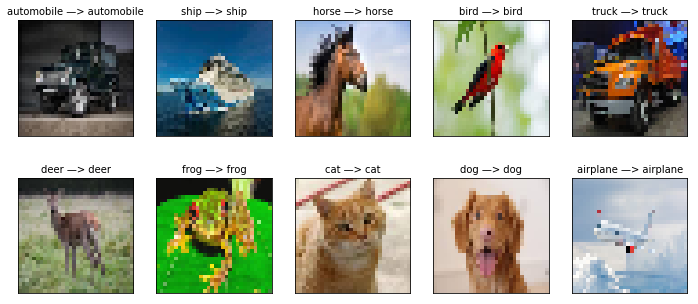

In [129]:


import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        #title=str(i)+','+label_dict[labels[i][0]]
        #if len(prediction)>0:
            #title+=' —> '+label_dict[prediction[i]]
        
        title=label_dict[labels[i][0]]
        if len(prediction)>0:
            title+=' —> '+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

plot_images_labels_prediction(pre_x,pre_y_label,
                              pre_y,0,10)

## 預測本地圖片（測試用）


In [0]:
import matplotlib
matplotlib.use('Agg')
import os
from keras.models import load_model
import numpy as np
from PIL import Image
import cv2


### 规范化图片大小和像素值

In [0]:
def get_inputs(src=[]):
    pre_x = []
    for s in src:
        input = cv2.imread(s)
        input = cv2.resize(input, (32, 32))
        # input = cv2.cvtColor(input, cv2.COLOR_BGR2RGB)
        pre_x.append(input)  # input一张图片
    pre_x = np.array(pre_x) / 255.0
    # pre_x_normalize = pre_x.astype('float32') / 255.0
    return pre_x
  

### 要预测的图片保存地址

In [31]:
predict_dir = 'Drive/Keras_Cifar_CNN/data/validation'
test = os.listdir(predict_dir)

print(test)

['frog', 'horse', 'truck', 'deer', 'airplane', 'bird', 'dog', 'ship', 'cat', 'automobile']


### 新建一个列表保存预测图片的地址

In [32]:
images = []

for testpath in test:
    for fn in os.listdir(os.path.join(predict_dir, testpath)):
        if fn.endswith('jpg'):
            fd = os.path.join(predict_dir, testpath, fn)
            print(fd)




Drive/Keras_Cifar_CNN/data/validation/frog/02.jpg
Drive/Keras_Cifar_CNN/data/validation/frog/01.jpg
Drive/Keras_Cifar_CNN/data/validation/horse/02.jpg
Drive/Keras_Cifar_CNN/data/validation/horse/01.jpg
Drive/Keras_Cifar_CNN/data/validation/truck/02.jpg
Drive/Keras_Cifar_CNN/data/validation/truck/01.jpg
Drive/Keras_Cifar_CNN/data/validation/deer/01.jpg
Drive/Keras_Cifar_CNN/data/validation/deer/02.jpg
Drive/Keras_Cifar_CNN/data/validation/airplane/01.jpg
Drive/Keras_Cifar_CNN/data/validation/airplane/02.jpg
Drive/Keras_Cifar_CNN/data/validation/bird/01.jpg
Drive/Keras_Cifar_CNN/data/validation/bird/02.jpg
Drive/Keras_Cifar_CNN/data/validation/dog/01.jpg
Drive/Keras_Cifar_CNN/data/validation/dog/02.jpg
Drive/Keras_Cifar_CNN/data/validation/ship/02.jpg
Drive/Keras_Cifar_CNN/data/validation/ship/01.jpg
Drive/Keras_Cifar_CNN/data/validation/cat/01.jpg
Drive/Keras_Cifar_CNN/data/validation/cat/02.jpg
Drive/Keras_Cifar_CNN/data/validation/automobile/02.jpg
Drive/Keras_Cifar_CNN/data/validatio

### 调用函数，规范化图片

In [0]:
pre_x = get_inputs(images)

In [0]:
(pre_x_data,pre_x_label) = ([pre_x],[5])

In [19]:
def plot_image(images, labels):
	
	fig = plt.gcf()
	fig.set_size_inches(3, 3)
	plt.imshow(np.reshape(images, (32, 32,3)), cmap='binary')
	plt.title("Class {}".format(labels))
	plt.show()

plot_image(pre_x_data[0], pre_x_label[0])

ValueError: ignored

<Figure size 216x216 with 0 Axes>

In [22]:
print(images[1])

IndexError: ignored

In [0]:
for i in images:
    print(images[1])

### 预测

In [27]:
prediction=model.predict_classes(pre_x)
prediction[:10]

ValueError: ignored

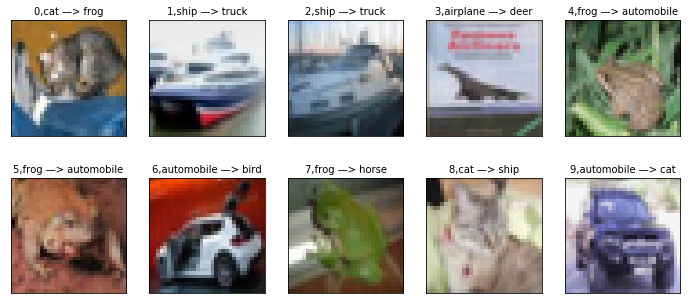

In [111]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+=' —> '+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

plot_images_labels_prediction(x_img_test,y_label_test,
                              prediction,0,10)

In [113]:
pre_y = model.predict(pre_x)
pre_y_OneHot = np_utils.to_categorical(pre_y)
print(pre_y_OneHot)


[[[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]

 ...

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]]


## FFG（測試用）


In [0]:
def load_data(path):
    for eachone in os.listdir(path):
        newname = eachone[7:]
        os.rename(path+"\\"+eachone,path+"\\"+newname)

In [41]:
data, labels = load_data(Drive/Keras_Cifar_CNN/pics_01)

NameError: ignored

In [0]:
predict = model.predict(data)